**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [41]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [42]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

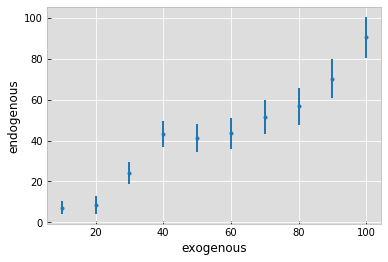

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [7]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     289.5
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           3.76e-08
Time:                        12:14:00   Log-Likelihood:                -35.100
No. Observations:                  10   AIC:                             72.20
Df Residuals:                       9   BIC:                             72.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7398      0.043     17.015      0.000       0.641       0.838
==============================================================================
Omnibus:                        1.512   Durbin-Watson:                   2.841
Prob(Omnibus):                  0.470   Jarque-Bera (JB):                0.343
Skew:                           0.453   Prob(JB):                        0.842
Kurtosis:                       3.058   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
#THE RIGHT WAY

//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     60.79
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           5.25e-05
Time:                        12:14:00   Log-Likelihood:                -35.023
No. Observations:                  10   AIC:                             74.05
Df Residuals:                       8   BIC:                             74.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1669      6.134     -0.353      0.733     -16.312      11.978
x1             0.7708      0.099      7.797      0.000       0.543       0.999
==============================================================================
Omnibus:                        0.832   Durbin-Watson:                   2.881
Prob(Omnibus):                  0.660   Jarque-Bera (JB):                0.060
Skew:                           0.189   Prob(JB):                        0.971
Kurtosis:                       2.980   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 4. plot the data (as points) and both statsmodels fits

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

# 6. repeat step 3

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.944
Model:                            WLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     134.8
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           2.75e-06
Time:                        12:14:01   Log-Likelihood:                -29.722
No. Observations:                  10   AIC:                             63.44
Df Residuals:                       8   BIC:                             64.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.5287      2.356     30.781      0.000      67.095      77.962
x1             0.6314      0.054     11.612      0.000       0.506       0.757
==============================================================================
Omnibus:                        1.226   Durbin-Watson:                   2.491
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                0.720
Skew:                           0.203   Prob(JB):                        0.698
Kurtosis:                       1.750   Cond. No.                         70.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

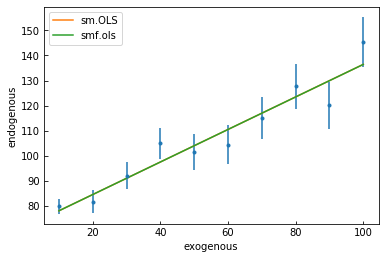

In [39]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();